In [2]:

!nvidia-smi
!python -V

# Stable pins for Kaggle (Python 3.10) that work with PyCaret 3.3.x
!pip -q install -U pip setuptools wheel
!pip -q install "pycaret==3.3.2" "gradio>=4,<5"

# sanity import
import sys, pycaret
print("Python:", sys.version.split()[0], "| PyCaret:", pycaret.__version__)

Thu Oct 23 19:04:54 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P8             11W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
!nvidia-smi
import sys, pycaret
print("Python:", sys.version.split()[0], "| PyCaret:", pycaret.__version__)


Thu Oct 23 19:05:42 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P8             11W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
import pandas as pd
import seaborn as sns

# Load from seaborn (tiny, clean)
df = sns.load_dataset("mpg")

# Basic cleaning: drop rows with missing target/features we’ll use
df = df.dropna(subset=["mpg","cylinders","displacement","horsepower","weight","acceleration","model_year","origin"])
# Convert 'origin' (category) and 'name' (text) handling
df["origin"] = df["origin"].astype(str)  # categorical
df = df.reset_index(drop=True)

print(df.shape)
df.head()


(392, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
if "name" in df.columns:
    df = df.drop(columns=["name"])
print("Columns:", list(df.columns))


Columns: ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']


In [6]:
from pycaret.regression import *

s = setup(
    data=df,
    target="mpg",
    session_id=42,
    use_gpu=True,     # will use GPU where supported
    fold=5,
    normalize=True,
    verbose=False
)

# Try a few models and pick top 3 by R2
top3  = compare_models(n_select=3, sort="R2")
tuned = [tune_model(m, optimize="R2") for m in top3]
blended = blend_models(tuned, optimize="R2")
best = automl(optimize="R2")
best


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...


1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.


[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1.9781,7.7615,2.7480,0.8770,0.1019,0.0818,6.0060
gbr,Gradient Boosting Regressor,2.0150,7.7937,2.7672,0.8730,0.1036,0.0842,0.1200
et,Extra Trees Regressor,1.9833,8.3335,2.8469,0.8665,0.1053,0.0821,0.1620
lightgbm,Light Gradient Boosting Machine,2.0903,8.8087,2.9330,0.8565,0.1101,0.0873,1.0720
xgboost,Extreme Gradient Boosting,2.1381,9.0449,2.9843,0.8526,0.1085,0.0874,0.2640
ada,AdaBoost Regressor,2.2871,9.9165,3.1282,0.8401,0.1208,0.1004,0.1180
knn,K Neighbors Regressor,2.2940,11.6835,3.3841,0.8149,0.1224,0.0951,0.1560
br,Bayesian Ridge,2.6844,12.4764,3.5098,0.8006,0.1557,0.1240,0.0500
ridge,Ridge Regression,2.6956,12.4724,3.5103,0.8005,0.1575,0.1252,0.0580
lr,Linear Regression,2.7069,12.4986,3.5152,0.8000,0.1593,0.1262,0.1960


[2025-10-23 19:06:39.786] [CUML] [info] Unused keyword parameter: n_jobs during cuML estimator initialization


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.1037,8.2834,2.8781,0.8776,0.1069,0.0906
1,2.1061,10.0436,3.1692,0.8140,0.1200,0.0894
2,2.1592,9.4770,3.0785,0.8832,0.1022,0.0845
3,1.4874,3.7813,1.9445,0.9263,0.0813,0.0669
4,1.9908,6.0689,2.4635,0.8957,0.0929,0.0801
Mean,1.9694,7.5308,2.7068,0.8793,0.1007,0.0823
Std,0.2472,2.3180,0.4520,0.0368,0.0130,0.0085


Fitting 5 folds for each of 10 candidates, totalling 50 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.0868,8.7644,2.9605,0.8705,0.1061,0.0871
1,2.1745,11.1796,3.3436,0.7930,0.1264,0.0923
2,2.1614,9.3075,3.0508,0.8853,0.1080,0.0872
3,1.7327,4.9969,2.2354,0.9026,0.0933,0.0784
4,1.9541,6.7384,2.5958,0.8842,0.0948,0.0778
Mean,2.0219,8.1974,2.8372,0.8671,0.1057,0.0846
Std,0.1644,2.1363,0.3841,0.0384,0.0119,0.0056


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.1998,9.3335,3.0551,0.8621,0.1159,0.0965
1,2.1965,12.0172,3.4666,0.7775,0.1343,0.0956
2,2.5587,14.6014,3.8212,0.8200,0.1343,0.1037
3,1.4718,3.6637,1.9141,0.9286,0.0835,0.0698
4,2.3249,9.9106,3.1481,0.8296,0.1170,0.0909
Mean,2.1503,9.9053,3.0810,0.8436,0.1170,0.0913
Std,0.3639,3.6276,0.6424,0.0504,0.0186,0.0115


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.9719,7.6381,2.7637,0.8871,0.1015,0.0842
1,2.0614,10.1710,3.1892,0.8117,0.1205,0.0872
2,2.1412,9.1310,3.0218,0.8874,0.1049,0.0852
3,1.4618,3.7804,1.9443,0.9263,0.0784,0.0648
4,1.9113,6.0651,2.4627,0.8957,0.0906,0.0751
Mean,1.9095,7.3571,2.6763,0.8817,0.0992,0.0793
Std,0.2371,2.2630,0.4408,0.0378,0.0141,0.0083


VotingRegressor(estimators=[('CatBoost Regressor',
                             <catboost.core.CatBoostRegressor object at 0x790016064750>),
                            ('Gradient Boosting Regressor',
                             GradientBoostingRegressor(random_state=42)),
                            ('Extra Trees Regressor',
                             ExtraTreesRegressor(n_jobs=-1, random_state=42))],
                n_jobs=1)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,1.7434,6.0079,2.4511,0.8864,0.0951,0.0770


,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg,prediction_label
78,4,96.0,69.0,2189,18.0,72,europe,26.000000,26.269031
274,4,121.0,115.0,2795,15.7,78,europe,21.600000,22.365334
246,4,91.0,60.0,1800,16.4,78,japan,36.099998,35.359901
55,4,91.0,70.0,1955,20.5,71,usa,26.000000,28.297199
387,4,140.0,86.0,2790,15.6,82,usa,27.000000,27.201901


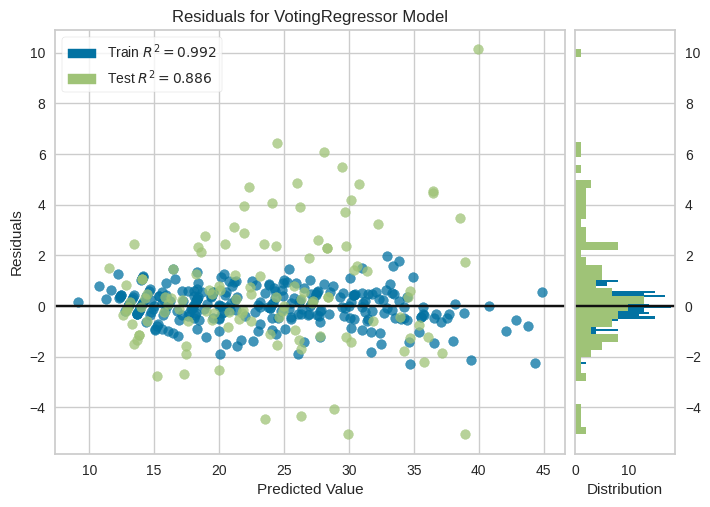

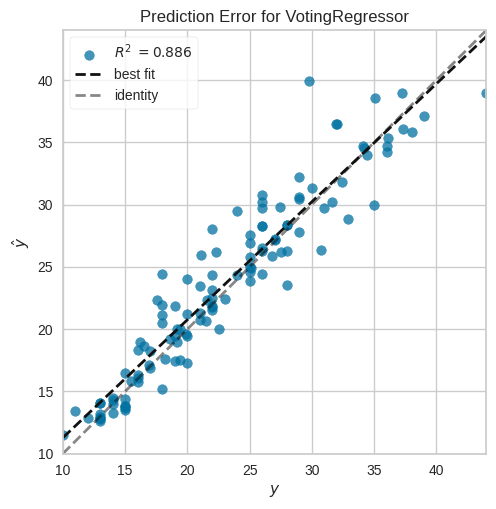

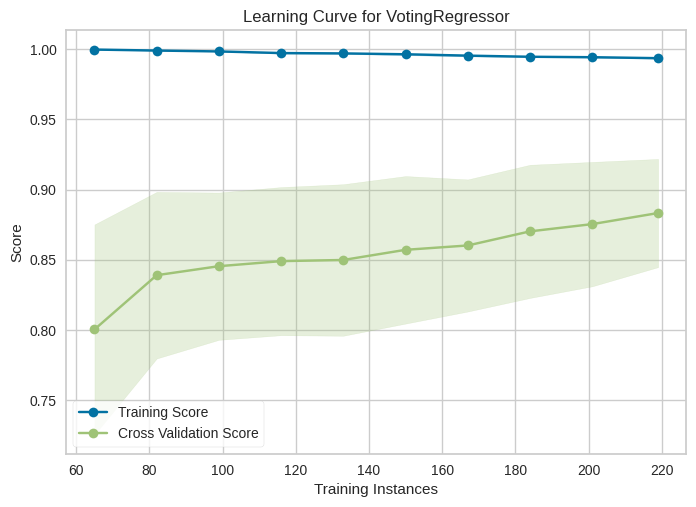

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['cylinders', 'displacement',
                                              'horsepower', 'weight',
                                              'acceleration', 'model_year'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['origin'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWra...
                                                               use_cat_names=True))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('trained_model',
                  VotingRegressor(estimators=[('CatBoost Regressor',
                                               <catboost.core.CatBoostRegressor object at 0x7900

In [10]:
# Predictions on hold-out
pred_holdout = predict_model(best)
display(pred_holdout.head())

# Useful plots
plot_model(best, plot="residuals")
plot_model(best, plot="error")
plot_model(best, plot="learning")


# Save leaderboard + model
lb = pull()
import os
os.makedirs("/kaggle/working/media/figures", exist_ok=True)
os.makedirs("/kaggle/working/notebooks", exist_ok=True)

lb.to_csv("/kaggle/working/media/figures/regression_mpg_leaderboard.csv", index=False)
save_model(best, "/kaggle/working/notebooks/regression_mpg_final")
